## Bibliothèques

In [2]:
import sys
import os
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

## Loading Files

### Set up Path

In [3]:
DIR_PATH = os.getcwd()
DATA_PATH = os.path.join(DIR_PATH + os.sep, "data")
WRLD_PATH = os.path.join(DATA_PATH + os.sep, "World")
BRL_PATH =  os.path.join(WRLD_PATH + os.sep, "Berlin")

### Load *.csv

In [4]:
listing = pd.read_csv(BRL_PATH + "/listings.csv", low_memory=False)
review = pd.read_csv(BRL_PATH + "/reviews.csv", low_memory=False)
#calendar = pd.read_csv(BRL_PATH + "/calendar.csv", low_memory=False)

## Clean files

In [5]:
listing.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,t,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,https://www.airbnb.com/rooms/3309,20181107122246,2018-11-07,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,https://www.airbnb.com/rooms/7071,20181107122246,2018-11-07,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,t,NaN,NaN,f,f,moderate,f,f,1,1.75


In [6]:
listing = listing.loc[:,['id', 'room_type', 'host_id', 'host_since', 'host_response_rate', 'reviews_per_month', 'review_scores_value', 'review_scores_location', 'review_scores_communication', 
'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_rating', 'price', 'cleaning_fee', 'zipcode', 'number_of_reviews']]
listing = listing.dropna(subset=['id', 'room_type', 'host_id', 'host_since', 'reviews_per_month', 'price', 'zipcode' ])
listing


,id,room_type,host_id,host_since,host_response_rate,reviews_per_month,review_scores_value,review_scores_location,review_scores_communication,review_scores_checkin,review_scores_cleanliness,review_scores_rating,price,cleaning_fee,zipcode,number_of_reviews
0,2015,Entire home/apt,2217,2008-08-18,96%,3.76,9.0,10.0,10.0,10.0,9.0,93.0,$60.00,$30.00,10119,118
1,2695,Private room,2986,2008-09-16,NaN,1.42,10.0,10.0,10.0,10.0,10.0,100.0,$17.00,$0.00,10437,6
2,3176,Entire home/apt,3718,2008-10-19,100%,1.25,9.0,10.0,9.0,9.0,9.0,92.0,$90.00,$50.00,10405,143
3,3309,Private room,4108,2008-11-07,NaN,0.39,9.0,9.0,10.0,9.0,9.0,88.0,$26.00,$30.00,10777,25
4,7071,Private room,17391,2009-05-16,100%,1.75,9.0,10.0,10.0,10.0,10.0,96.0,$42.00,$0.00,10437,197
5,9991,Entire home/apt,33852,2009-08-25,100%,0.15,10.0,10.0,10.0,10.0,10.0,100.0,$180.00,$80.00,10405,6
6,14325,Entire home/apt,55531,2009-11-18,100%,0.23,9.0,9.0,10.0,9.0,10.0,93.0,$70.00,$0.00,10437,23
8,16644,Entire home/apt,64696,2009-12-20,100%,0.47,9.0,9.0,10.0,10.0,10.0,94.0,$90.00,$50.00,10997,48
9,17409,Private room,67590,2010-01-04,100%,2.83,10.0,10.0,10.0,10.0,10.0,96.0,$45.00,$18.00,10405,279
10,17904,Entire home/apt,68997,2010-01-08,NaN,2.10,9.0,10.0,10.0,10.0,9.0,96.0,$49.00,$50.00,12047,223


## Analysis

### Price

In [7]:
listing.price = [x.strip('$') for x in listing.price]
listing.price = listing.price.apply(lambda x: x.replace(',',''))
listing.price = [float(x) for x in listing.price]
listing_price = listing.sort_values(by="price")
listing_price

,id,room_type,host_id,host_since,host_response_rate,reviews_per_month,review_scores_value,review_scores_location,review_scores_communication,review_scores_checkin,review_scores_cleanliness,review_scores_rating,price,cleaning_fee,zipcode,number_of_reviews
12621,18612697,Private room,49435601,2015-11-19,NaN,1.43,10.0,9.0,10.0,10.0,10.0,98.0,0.0,$10.00,12277,26
14398,20382969,Private room,34385521,2015-05-27,NaN,0.07,10.0,10.0,10.0,10.0,10.0,100.0,0.0,$20.00,10249,1
14742,20671210,Entire home/apt,1210739,2011-09-26,NaN,0.67,9.0,9.0,10.0,10.0,10.0,100.0,0.0,$0.00,12681,3
14241,20218037,Private room,83835882,2016-07-14,NaN,5.11,9.0,10.0,10.0,10.0,9.0,91.0,0.0,$10.00,10117,70
14795,20717658,Entire home/apt,127309004,2017-04-24,NaN,0.32,7.0,9.0,7.0,6.0,10.0,75.0,0.0,$70.00,10245,4
14351,20317884,Entire home/apt,23943422,2014-11-19,NaN,0.07,10.0,10.0,10.0,10.0,10.0,100.0,0.0,$15.00,10405,1
17054,22739713,Private room,167202681,2018-01-11,100%,9.32,9.0,10.0,10.0,10.0,8.0,89.0,1.0,$10.00,10557,87
16153,21911198,Shared room,159867873,2017-11-23,100%,1.49,10.0,9.0,10.0,10.0,10.0,100.0,8.0,NaN,12169,10
18548,24452824,Private room,80898392,2016-06-30,NaN,5.30,10.0,10.0,10.0,10.0,10.0,98.0,8.0,$30.00,10969,35
10854,16298466,Private room,80898392,2016-06-30,NaN,1.95,10.0,10.0,10.0,10.0,10.0,98.0,8.0,$30.00,10969,44


In [8]:
meanPrice = listing.price.mean()
print("Mean price for a night in Berlin : " + str(meanPrice) + "$.")

Mean price for a night in Berlin : 62.182681687651865$.


<function matplotlib.pyplot.show(*args, **kw)>

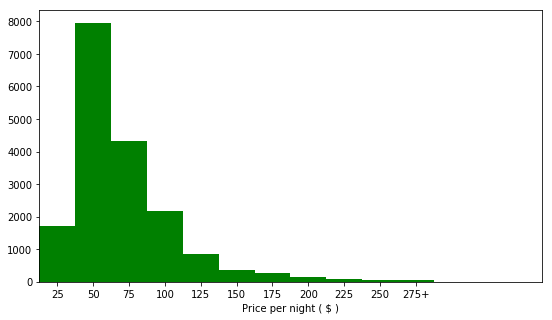

In [9]:
price = listing['price']
fig, ax = plt.subplots(figsize=(9, 5))
bins = numpy.arange(0,300,25)
xlabels = bins[1:].astype(str)
xlabels[-1] += '+'
N_labels = len(xlabels)
plt.xlim([0, 350])
plt.xticks(25 * numpy.arange(N_labels) + 12.5)
ax.set_xticklabels(xlabels)
plt.xlabel("Price per night ( $ )")
plt.hist(price, color='green', bins = bins)
plt.show

### Type of house

In [10]:
nbRoom = len(listing)
print("Total of house :" + str(nbRoom))

Total of house :18108


In [11]:
room = listing
entire = room.loc[room["room_type"]=="Entire home/apt"]
private = room.loc[room["room_type"]=="Private room"]
nbEntire = len(entire)
nbPrivate = len(private)
percEntire = nbEntire/nbRoom * 100
percPrivate = nbPrivate/nbRoom * 100
print("Total Entire home/apt : " + str(nbEntire) + " (" + str(percEntire) + "%).")
print("Total Private room : " + str(nbPrivate) + " (" + str(percPrivate) + "%).")

Total Entire home/apt : 8647 (47.752374641042636%).
Total Private room : 9252 (51.0934393638171%).


In [12]:
meanEntire = entire.price.mean()
meanPrivate = private.price.mean()
print("Mean price for entire home/apt :" + str(meanEntire) + "$.")
print("Mean price for Private room :" + str(meanPrivate) + "$.")

Mean price for entire home/apt :82.28044408465364$.
Mean price for Private room :44.05263726761781$.


In [13]:
ttest_ind(private["price"], entire["price"])

Ttest_indResult(statistic=-17.368582355369753, pvalue=5.0585496508095666e-67)

## Activity

In [14]:
reviewMonthMean = room.reviews_per_month.mean()
print("Mean of review per month : " + str(reviewMonthMean))

Mean of review per month : 1.1407897062071968


In [15]:
nbReview = len(review)
debut = min(review["date"])
print("Total reviews since " + str(debut) + " : " + str(nbReview))

Total reviews since 2009-06-20 : 401963


In [16]:
review['date'] = pd.to_datetime(review['date'])
year = review.loc[:,['date']]
yearReview = year.groupby(year.date.dt.year).count()
print("Total reviews per year :")
yearReview



Total reviews per year :


,date
date,
2009,3
2010,107
2011,617
2012,3092
2013,7422
2014,17702
2015,39470
2016,69303
2017,111799


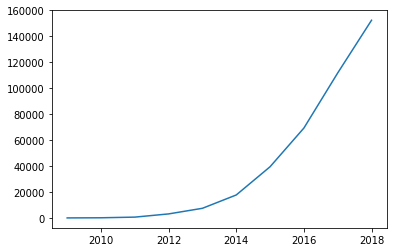

In [17]:
plt.plot(yearReview)

## TOP 10 room

In [20]:
lot_of_rev = listing.nlargest(100, "number_of_reviews")
top_10 = lot_of_rev.nlargest(10, "review_scores_rating")
top_10 = top_10.loc[:,['id', 'room_type', 'host_id', 'host_since', 'reviews_per_month', 'review_scores_rating', 'price', 'zipcode', 'number_of_reviews']]
top_10


,id,room_type,host_id,host_since,reviews_per_month,review_scores_rating,price,zipcode,number_of_reviews
7059,10122398,Entire home/apt,22276081,2014-10-08,8.44,99.0,60.0,10963,293
1505,1953003,Entire home/apt,8381463,2013-08-25,4.46,99.0,77.0,10437,266
154,192499,Private room,868282,2011-07-25,4.51,98.0,49.0,10967,398
134,181160,Private room,868282,2011-07-25,4.36,98.0,39.0,10967,385
4922,7429427,Private room,27577775,2015-02-11,8.08,98.0,46.0,10405,322
394,362701,Entire home/apt,1832975,2012-02-29,3.92,98.0,89.0,10997,313
6957,9994644,Entire home/apt,22276081,2014-10-08,8.83,98.0,60.0,10963,305
7044,10103689,Entire home/apt,22276081,2014-10-08,8.76,98.0,60.0,10963,304
1049,1188244,Private room,6497355,2013-05-21,4.32,98.0,42.0,10405,286
1773,2394897,Entire home/apt,12234103,2014-02-14,4.95,98.0,98.0,10119,279


## Saving CSV

In [19]:
LIS_PATH = os.path.join(BRL_PATH + os.sep, "clean_listing.csv")
PRI_PATH = os.path.join(BRL_PATH + os.sep, "price.csv")
ENT_PATH = os.path.join(BRL_PATH + os.sep, "entire_house.csv")
PRV_PATH = os.path.join(BRL_PATH + os.sep, "private_room.csv")
YEA_PATH = os.path.join(BRL_PATH + os.sep, "year_review.csv")

listing_price.to_csv(LIS_PATH)
price.to_csv(PRI_PATH)
entire.to_csv(ENT_PATH)
private.to_csv(PRV_PATH)
yearReview.to_csv(BRL_PATH + "/year_review.csv")